# Calculating the convex hull

Determining the convex hull is useful for many applications, such as linear programming, where the convex hull declares the boundary of the solution landscape. In graph theory the convex hull can illustrate the shortest path around nodes and hence be used to determine clusters and overlaps between sets of nodes.

![gif](artwork/take1.gif)

A textbook approach to solve the convex hull is to use the "left/right turn" 
approach and visit all nodes in a sequential appraoch. This is obviously O(n),
but it requires that all nodes have been sorted O(n log n).

> Andrew's monotone chain convex hull algorithm constructs the convex hull of a
> set of 2-dimensional points in O(n log n) time.
>
> It does so by first sorting the points lexicographically (first by x-coordinate,
> and in case of a tie, by y-coordinate), and then constructing upper and lower
> hulls of the points in O(n) time.
>
> An upper hull is the part of the convex hull, which is visible from the above.
> It runs from its rightmost point to the leftmost point in counterclockwise order.
> Lower hull is the remaining part of the convex hull.

[source](https://en.wikibooks.org/wiki/Algorithm_Implementation/Geometry/Convex_hull/Monotone_chain)


For the algorithm we need very little:


In [1]:
from collections import namedtuple

With named tuple we can create points as:

In [2]:
Point = namedtuple('Point', ['x', 'y'])

And this allows us to create a repeateable point cloud using:

In [3]:
from random import randint, seed
seed(42)

def point_cloud(n_points, x_max=400, y_max=300):
    return [Point(x=randint(-x_max, x_max), y=randint(-y_max, y_max)) for _ in range(n_points)]

When traversing the sorted dataset from min(x) to max(x), we will have to assess
whether each point causes the curve to turn left or right.

In [4]:
def right_turn(A, B, C):
    dxAC, dyAC = C.x - A.x, C.y - A.y
    dxAB, dyAB = B.x - A.x, B.y - A.y
    if dxAC == 0:
        aAC = float('inf')
    else:
        aAC = dyAC / dxAC
    if dxAB == 0:
        aAB = float('inf')
    else:
        aAB = dyAB / dxAB

    if aAB > aAC:  # right
        return True
    elif aAB < aAC:  # left
        return False
    else:  # straight
        return None


We can use this, then, for the lower and the upper part of the convex hull, 
so that, respectively:

- all turns on the lower hull are towards the left.
- all turns on the upper hull are towards the right.

If we encounter a turn in the opposite direction, we will have to backtrack, 
and remove all preceding points for the list that constitutes the hull, until
all turns are in the correct direction.

Note that some [textbooks](https://github.com/norvig/pytudes/blob/master/ipynb/Convex%20Hull.ipynb) 
traverse the dataset twice: Once for the upper hull,  then once for the lower hull.
I prefer having making both lists at once. 


In [5]:
def convex_hull(points):
    n_points = len(points)
    assert n_points >= 3, "can't have a hull with < 3 points."
    points.sort(key=lambda p: (p.x, p.y))

    upper_hull = []
    lower_hull = []
    for point in points:

        upper_hull.append(point)
        while len(upper_hull) >= 3:
            a, b, c = upper_hull[-3:]
            if right_turn(a, b, c) is True:
                break
            else:
                upper_hull.remove(b)

        lower_hull.append(point)
        while len(lower_hull) >= 3:
            a, b, c = lower_hull[-3:]
            if right_turn(a, b, c) is False:
                break
            else:
                lower_hull.remove(b)

    return upper_hull[:-1] + lower_hull[::-1]


The missing bit is to look at the data. We can do that with matplotlib:

In [10]:
from matplotlib import pyplot as plt

def plot(points, line=None, title=""):
    from matplotlib import pyplot as plt

    plt.figure()
    xs = [c.x for c in points]
    ys = [c.y for c in points]

    plt.plot(xs, ys, 'o')

    if line:
        xs = [c.x for c in line]
        ys = [c.y for c in line]
        plt.plot(xs, ys, 'bo-')
    plt.title(title)
    plt.show()

Here are some examples:

### A triangle

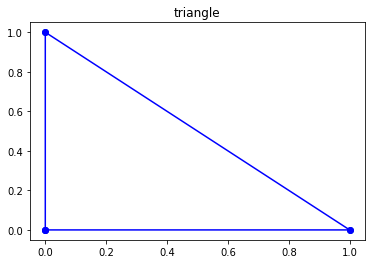

In [11]:
def test_triangle():
    points = [Point(x, y) for x, y in [(0, 0), (0, 1), (1, 0)]]
    hull = convex_hull(points)
    plot(points, hull, title="triangle")

test_triangle()

### A box

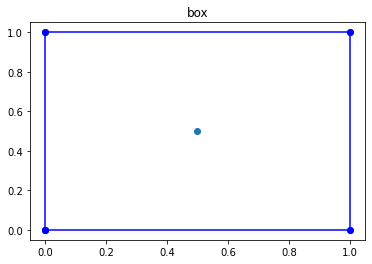

In [12]:

def test_box():
    points = [Point(x, y) for x, y in [(0, 0), (0, 1), (0.5, 0.5), (1, 1), (1, 0)]]
    hull = convex_hull(points)
    plot(points, hull, title="box")

test_box()

### Random clouds


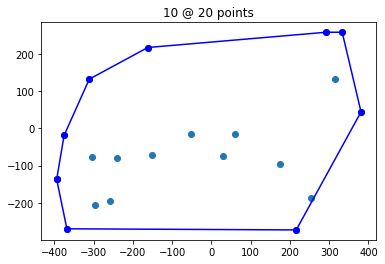

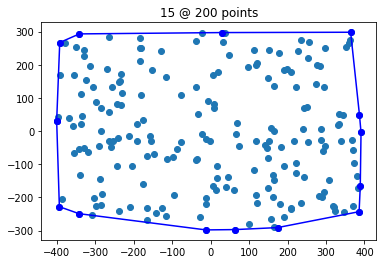

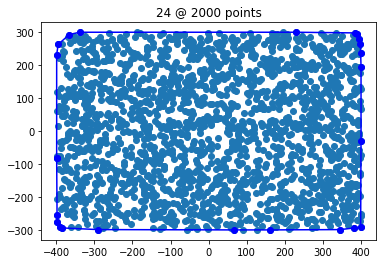

In [13]:
def test_random():
    for i in range(1,4):
        points = point_cloud(2*10**i)
        hull = convex_hull(points)
        plot(points, hull, title=f"{len(hull)} @ {len(points)} points")

test_random()

A classic :-) 